# Data Preprocessing

**Why Data Preprocessing?**  

If you are going to build a model—whether it's machine learning or deep learning—you must do data cleaning or preprocessing. 🧹  

This includes handling missing values, outliers, scaling, and transformations etc.  

It helps improve model performance and avoids getting stuck.  
Also, it helps create a generalized model. ✅💡🧠

In [1]:
# import necessary libraries 

# System Libraries
import os

# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings Handling
import warnings
warnings.filterwarnings('ignore')

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from tensorflow.keras.utils import to_categorical

# random
import random

# Pillow
from PIL import Image, UnidentifiedImageError

# math
import math

# functions
from utils.image_preprocessing import ImagePrePreprocessingData

# computer vision 
import cv2

# shuffle
from sklearn.utils import shuffle

# train and test split 
from sklearn.model_selection import train_test_split
import hashlib

# albumentations for augmentation
import albumentations as A

### Image Collection

*Collect all images into one folder and assign clear, correct labels for each image. Make sure everything is well organized ✅🗂️🧠*

In [2]:
dataPath = '../artifacts/data_ingestion/Embryo_Master_Folder/'

In [3]:
# check the data ingestion or not 

os.listdir(dataPath)

['8-cell Grade A',
 '8-cell Grade B',
 '8-cell Grade C',
 'Blastocyst Grade A',
 'Blastocyst Grade B',
 'Blastocyst Grade C',
 'Error Images',
 'Morula Grade A',
 'Morula Grade B',
 'Morula Grade C']

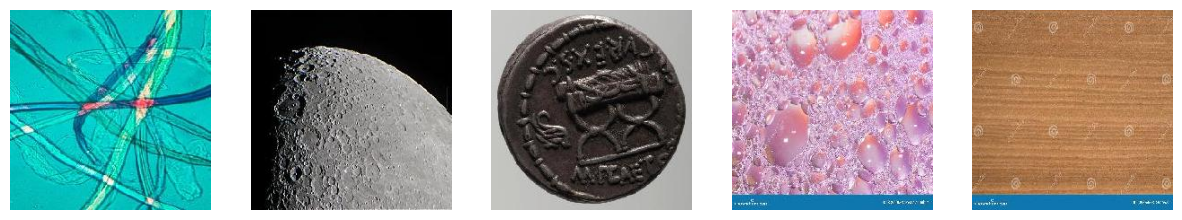

In [4]:
ImagePrePreprocessingData.visualImagesRandomly(dataPath, 'Error Images')

#### Standard Format .jpg

In [5]:
for folder in os.listdir(dataPath):
    folder_path = os.path.join(dataPath, folder)
    
    if os.path.isdir(folder_path):  # ✅ Check only folders
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)

            # ✅ Convert only .png or .webp or others to .jpg
            if os.path.isfile(img_path) and file.lower().endswith((".png", ".jpeg", ".webp")):
                try:
                    img = Image.open(img_path).convert("RGB")

                    new_img_path = os.path.splitext(img_path)[0] + ".jpg"
                    img.save(new_img_path, "JPEG")

                    os.remove(img_path)  # 🗑️ Delete original image

                except Exception as e:
                    print(f"❌ Error converting {img_path}: {e}")

print("🎉 All images converted to .jpg and originals deleted!")

🎉 All images converted to .jpg and originals deleted!


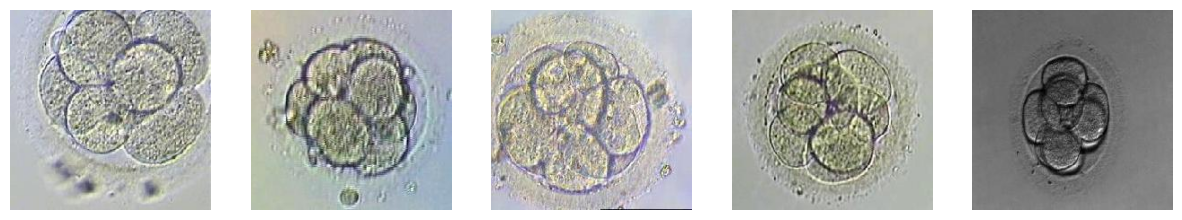

In [6]:
ImagePrePreprocessingData.visualImagesRandomly(dataPath, '8-cell Grade A')

### Resize

In [7]:
for folder in os.listdir(dataPath):
    if folder:
        for folderPath in os.listdir(os.path.join(dataPath, folder)):
            
            # image path
            img_path = os.path.join(dataPath, folder, folderPath)

            # 1. Load & Resize
            img = load_img(img_path, target_size=(224, 224))

            # 2. Convert to array
            img_array = img_to_array(img)

            # 3. convert back to image 
            img_ready = array_to_img(img_array)

            # 4. save the  image exiting path 
            img_ready.save(img_path)

print("✅ Image resized and saved back successfully! 🖼️💾")

✅ Image resized and saved back successfully! 🖼️💾


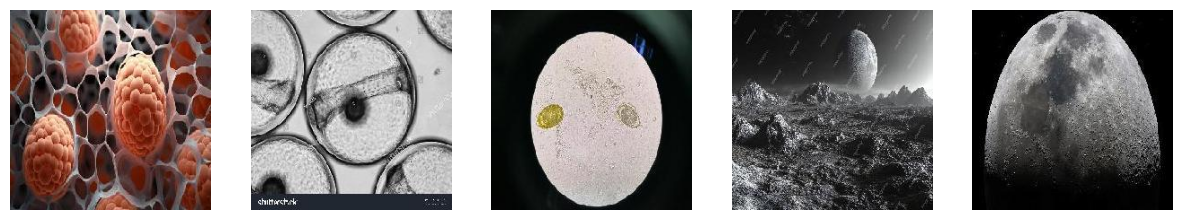

In [9]:
ImagePrePreprocessingData.visualImagesRandomly(dataPath,  "Error images")

#### Convert RGB 

In [10]:
import os
from PIL import Image

for folder in os.listdir(dataPath):
    if folder:
        for folderPath in os.listdir(os.path.join(dataPath, folder)):

            # Image path
            img_path = os.path.join(dataPath, folder, folderPath)

            # Open the image using Pillow
            img = Image.open(img_path)

            # Check if the image is grayscale (L mode) or RGB (3 channels)
            if img.mode == "L":  # If grayscale
                # Convert grayscale to RGB
                rgb_img = img.convert("RGB")
                rgb_img.save(img_path)
                print(f"Converted {img_path} to RGB")

print("✅ All images processed! 🖼️💾")


✅ All images processed! 🖼️💾


In [11]:
# Ensure all of then RGB image 

flag = 0

for folder in os.listdir(dataPath):
    if folder:
        for folderPath in os.listdir(os.path.join(dataPath, folder)):

            # Image path
            img_path = os.path.join(dataPath, folder, folderPath)

            # Open the image using Pillow
            img = Image.open(img_path)

            # Check if the image is grayscale (mode "L")
            if img.mode == "L":
                flag = 1

# After processing all images, check if any grayscale image was found
if flag == 0:
    print("The images are in color. 🌈")
else:
    print("Converted grayscale image(s) to RGB. 🖼️✅")

The images are in color. 🌈


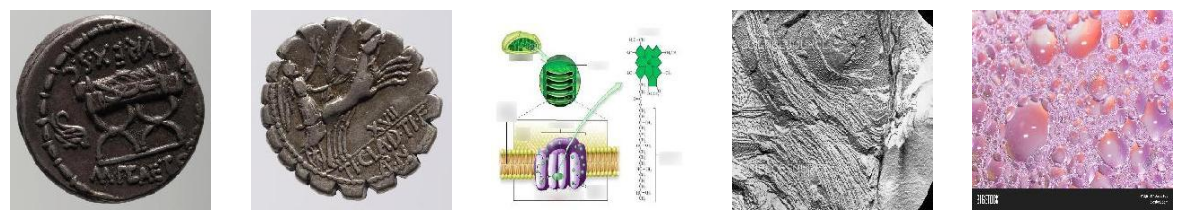

In [12]:
# visual the image randomly 

ImagePrePreprocessingData.visualImagesRandomly(dataPath,  "Error images")

#### Data Augmentation

In [13]:
# Before data augmentation data counts 

for folder in os.listdir(dataPath):
    img_path = os.path.join(dataPath, folder)
    if img_path:
        print(f'{folder} : {len(os.listdir(img_path))}')
    else:
        print("Not found the path")

8-cell Grade A : 150
8-cell Grade B : 150
8-cell Grade C : 150
Blastocyst Grade A : 123
Blastocyst Grade B : 105
Blastocyst Grade C : 104
Error Images : 268
Morula Grade A : 134
Morula Grade B : 150
Morula Grade C : 150


In [ ]:
# 🔁 Augmentations

augmentations = [
    A.HorizontalFlip(p=1),
    A.VerticalFlip(p=1),
    A.RandomBrightnessContrast(p=1),
    A.Rotate(limit=30, p=1),
    A.Blur(blur_limit=3, p=1),
    A.RandomGamma(p=1),
    A.RGBShift(p=1),
    A.CLAHE(p=1),
    A.HueSaturationValue(p=1),
    A.RandomShadow(p=1)
]

# 🎯 Resize augment
resize_224 = A.Resize(224, 224)

for folder in os.listdir(dataPath):
    folder_path = os.path.join(dataPath, folder)
    if not os.path.isdir(folder_path):
        continue

    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    total_needed = 1000
    current_count = len(image_files)

    print(f"📁 Folder: {folder} | 🖼️ Current: {current_count}")

    img_index = 0
    while current_count < total_needed and img_index < len(image_files):
        img_name = image_files[img_index]
        img_path = os.path.join(folder_path, img_name)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize original before augmentation
        image = resize_224(image=image)["image"]

        # 🌀 Shuffle and pick required augmentations
        aug_list = random.sample(augmentations, min(10, total_needed - current_count))

        for i, aug in enumerate(aug_list):
            augmented = aug(image=image)["image"]
            augmented = resize_224(image=augmented)["image"]  # Resize after aug too

            save_path = os.path.join(folder_path, f"aug_{img_index}_{i}.jpg")
            cv2.imwrite(save_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))
            current_count += 1

            if current_count >= total_needed:
                break

        img_index += 1

    print(f"✅ Done: {folder} | 🔢 Total images: {current_count}")

print("🎉 All folders now have 1000 images, all resized to 224x224! 🚀")

📁 Folder: 8-cell Grade A | 🖼️ Current: 1000
✅ Done: 8-cell Grade A | 🔢 Total images: 1000
📁 Folder: 8-cell Grade B | 🖼️ Current: 1000
✅ Done: 8-cell Grade B | 🔢 Total images: 1000
📁 Folder: 8-cell Grade C | 🖼️ Current: 1000
✅ Done: 8-cell Grade C | 🔢 Total images: 1000
📁 Folder: Blastocyst Grade A | 🖼️ Current: 1000
✅ Done: Blastocyst Grade A | 🔢 Total images: 1000
📁 Folder: Blastocyst Grade B | 🖼️ Current: 1000
✅ Done: Blastocyst Grade B | 🔢 Total images: 1000
📁 Folder: Blastocyst Grade C | 🖼️ Current: 1000
✅ Done: Blastocyst Grade C | 🔢 Total images: 1000
📁 Folder: Error Images | 🖼️ Current: 1000
✅ Done: Error Images | 🔢 Total images: 1000
📁 Folder: Morula Grade A | 🖼️ Current: 1000
✅ Done: Morula Grade A | 🔢 Total images: 1000
📁 Folder: Morula Grade B | 🖼️ Current: 1000
✅ Done: Morula Grade B | 🔢 Total images: 1000
📁 Folder: Morula Grade C | 🖼️ Current: 1000
✅ Done: Morula Grade C | 🔢 Total images: 1000
🎉 All folders now have 1000 images, all resized to 224x224! 🚀


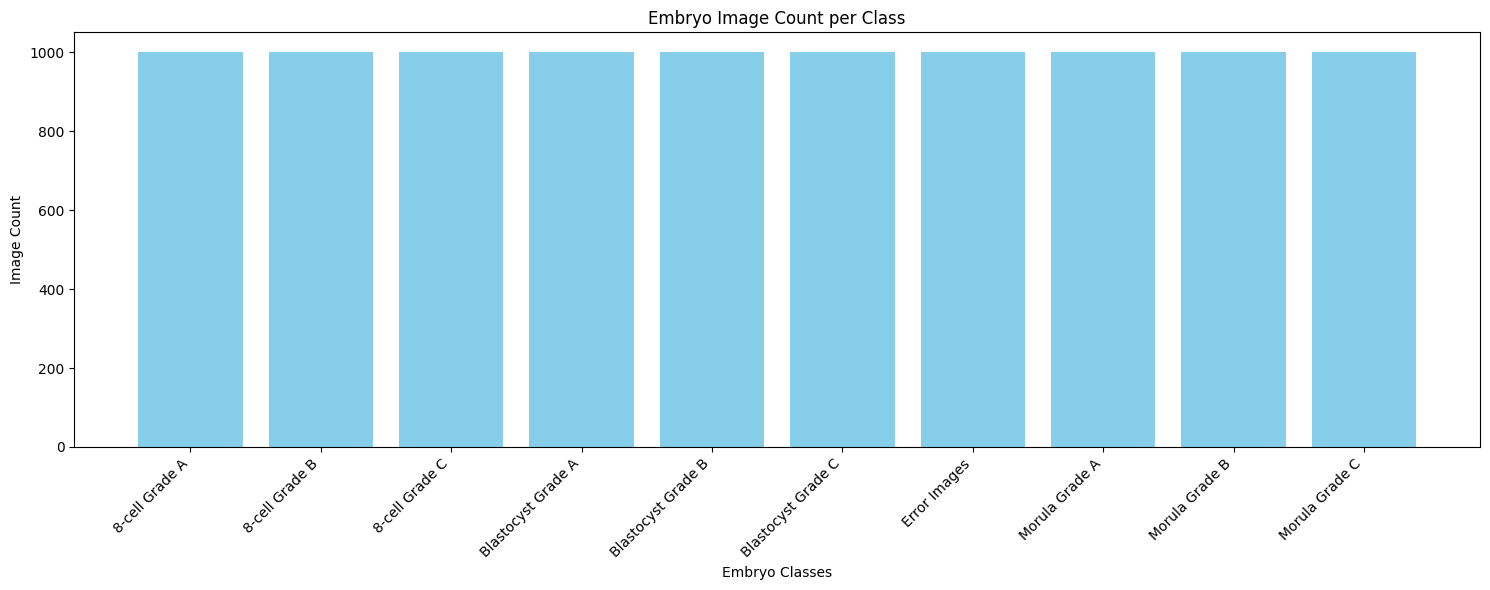

In [22]:
# After augmentation visual the classes count 

base_path = '../artifacts/data_ingestion/Embryo_Master_Folder/'

ImagePrePreprocessingData.VisualClassesCount(base_path)

In [23]:
# Images count 

for folder in os.listdir(dataPath):
    folder_path = os.path.join(dataPath, folder)
    print(folder, ":", len(os.listdir(folder_path)))

8-cell Grade A : 1000
8-cell Grade B : 1000
8-cell Grade C : 1000
Blastocyst Grade A : 1001
Blastocyst Grade B : 1000
Blastocyst Grade C : 1000
Error Images : 1000
Morula Grade A : 1000
Morula Grade B : 1000
Morula Grade C : 1000


#### convert to array

In [24]:
X = []
y = []

base_path = '../artifacts/data_ingestion/Embryo_Master_Folder/'

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)

    if os.path.isdir(folder_path):
        label = folder

        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)

            try:
                img = Image.open(img_path)

                # Force to RGB and resize
                img = img.convert("RGB").resize((224, 224))

                # Convert to array
                img_array = np.array(img, dtype=np.uint8)  # ✅ Set dtype to avoid issues

                # Check shape
                if img_array.shape == (224, 224, 3):
                    X.append(img_array)
                    y.append(label)

            except Exception as e:
                print(f"⚠️ Skipped {img_path}: {e}")

# Now safe to convert
X = np.array(X)
y = np.array(y)

print("✅ All images are loaded with same shape! 🧠")
print("X shape:", X.shape)
print("y shape:", y.shape)

✅ All images are loaded with same shape! 🧠
X shape: (10001, 224, 224, 3)
y shape: (10001,)


In [25]:
# total images 
print(f"✅ Total Images: {X.shape}")

# labels
print(f"🎯 Total Labels: {len(np.unique(y))}")

✅ Total Images: (10001, 224, 224, 3)
🎯 Total Labels: 10


#### Image Cleaning Process

##### ✅ Remove:
- Blank images  
- Duplicates  
- Corrupted files  

In [26]:
import hashlib

def hash_image(img):
    return hashlib.md5(img.tobytes()).hexdigest()

clean_images = []
clean_labels = []
seen_hashes = set()

for img, label in zip(X, y):
    if img is not None and img.size != 0:
        img_hash = hash_image(img)
        if img_hash not in seen_hashes:
            clean_images.append(img)
            clean_labels.append(label)
            seen_hashes.add(img_hash)

clean_images = np.array(clean_images)
clean_labels = np.array(clean_labels)

print(f"✅ Cleaned images count: {len(clean_images)} 🖼️")
print(f"✅ Cleaned labels count: {len(clean_labels)} 🏷️")


✅ Cleaned images count: 9579 🖼️
✅ Cleaned labels count: 9579 🏷️


#### Split Data (train, test) 

In [27]:
clean_images, clean_labels = shuffle(clean_images, clean_labels, random_state = 42)

print("✅ Data shuffled successfully 🌀")

✅ Data shuffled successfully 🌀


In [28]:
# clean images and labels counts

print("clean images count:", clean_images.shape)

print("clean labels count:", clean_labels.shape)

clean images count: (9579, 224, 224, 3)
clean labels count: (9579,)


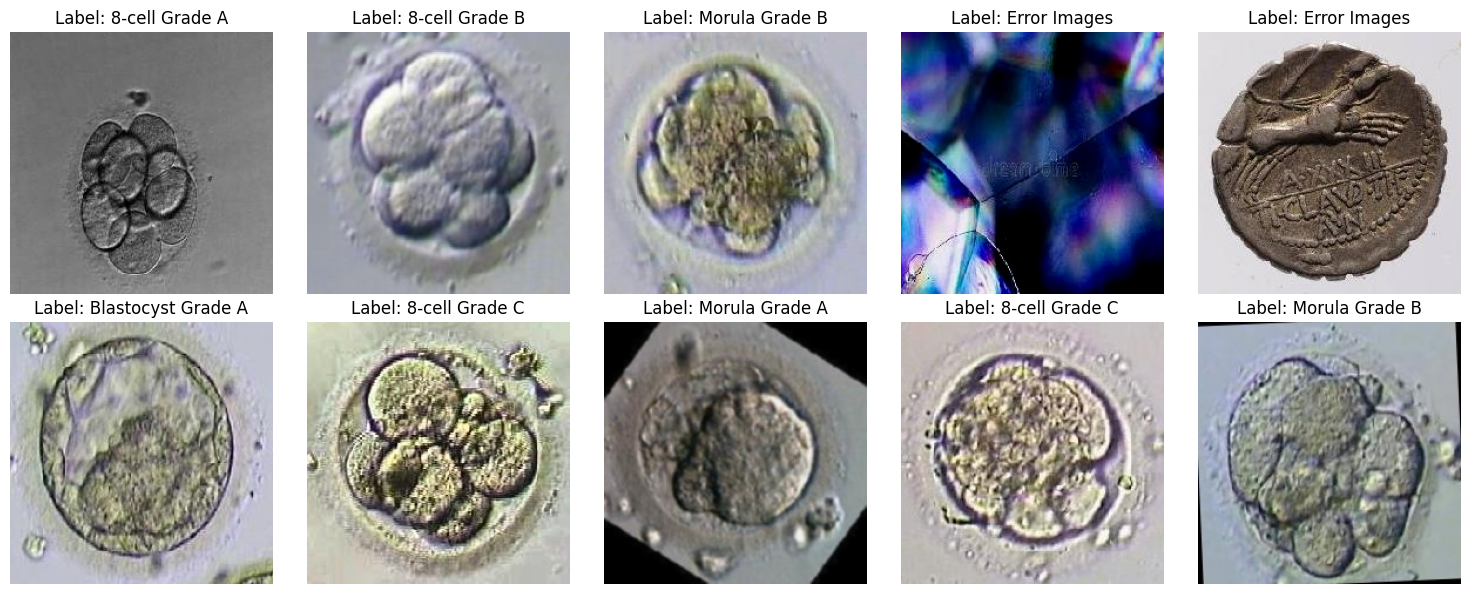

In [34]:
# clean dataset visual images and labels 

indices = random.sample(range(len(clean_images)), 10)

# Plot
plt.figure(figsize=(15, 6))

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(clean_images[idx])  # RGB image
    plt.title(f"Label: {clean_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [35]:
clean_images[0].shape

(224, 224, 3)

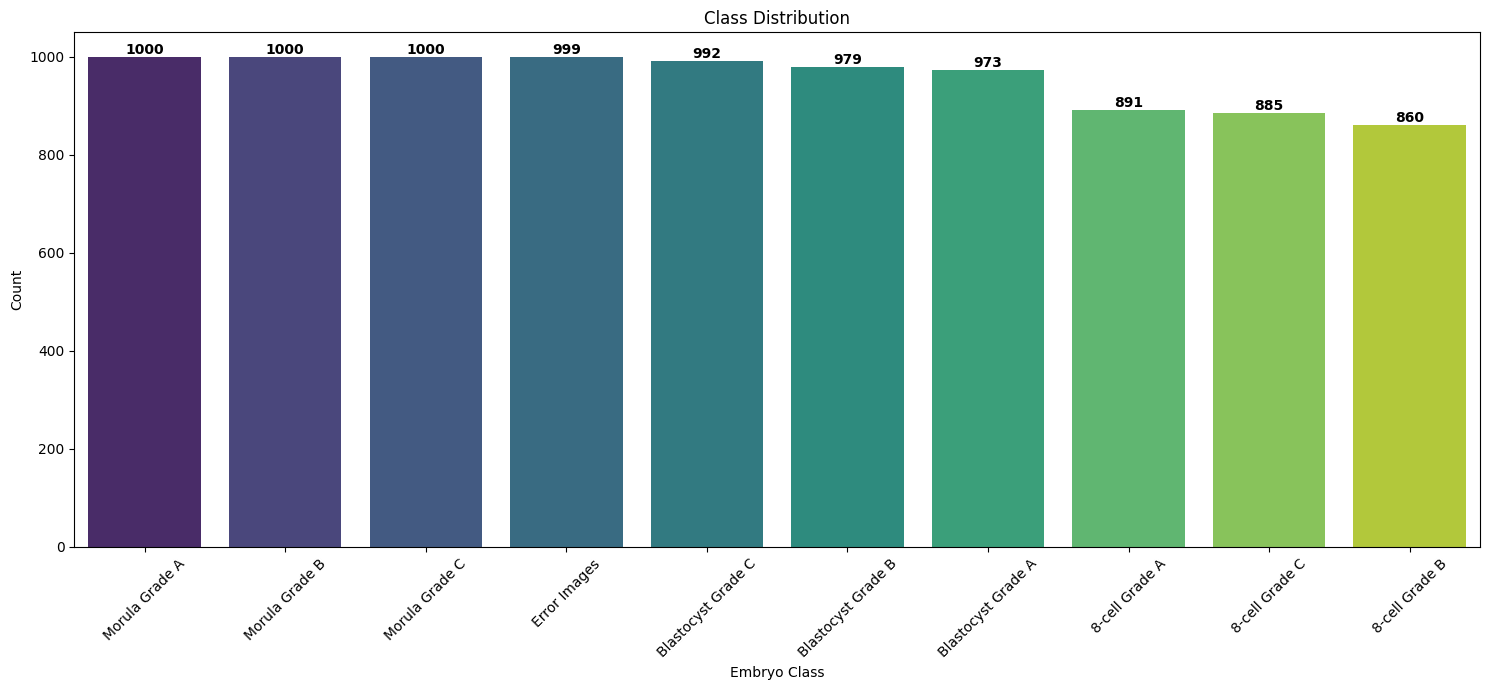

In [37]:
# classes counts after remove the duplicate and blank image then Corrupted image  

classes = pd.DataFrame({'Labels': clean_labels})

label_counts = classes['Labels'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

plt.figure(figsize=(15, 7))
plot = sns.barplot(x='Label', y='Count', data=label_counts, palette='viridis')

# 💬 Add count on top of bars
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.xlabel("Embryo Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(clean_images, clean_labels, test_size = 0.10, stratify = clean_labels, random_state=42)

In [43]:
X_train.shape

(8621, 224, 224, 3)

In [44]:
X_test.shape

(958, 224, 224, 3)

In [45]:
y_train.shape

(8621,)

In [46]:
y_test.shape

(958,)

In [47]:
# train labels count 

pd.Series(y_train).value_counts()

Morula Grade A        900
Morula Grade B        900
Morula Grade C        900
Error Images          899
Blastocyst Grade C    893
Blastocyst Grade B    881
Blastocyst Grade A    876
8-cell Grade A        802
8-cell Grade C        796
8-cell Grade B        774
Name: count, dtype: int64

In [48]:
# test labels count 

pd.Series(y_test).value_counts()

Morula Grade C        100
Morula Grade A        100
Error Images          100
Morula Grade B        100
Blastocyst Grade C     99
Blastocyst Grade B     98
Blastocyst Grade A     97
8-cell Grade C         89
8-cell Grade A         89
8-cell Grade B         86
Name: count, dtype: int64

In [ ]:
# Save training dataset 

np.savez('../artifacts/data_ingestion/Preprocessed Dataset/train_data.npz', X_train, y_train) 

In [50]:
# Save  test dataset 

np.savez('../artifacts/data_ingestion/Preprocessed Dataset/test_data.npz', X_test, y_test)